# 키움증권 OpenAPI+ 사용 예시

In [1]:
import platform

assert platform.architecture()[0] == '32bit'

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import logging

In [6]:
logging.basicConfig(
  format='%(asctime)s [%(levelname)s] %(message)s - %(filename)s:%(lineno)d',
  level=logging.DEBUG)

In [7]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

## 1. 엔트리포인트 객체 생성

In [8]:
from koapy import KiwoomOpenApiPlusEntrypoint

c:\Users\kihon\miniconda3\envs\py32\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
entrypoint = KiwoomOpenApiPlusEntrypoint()

2023-04-24 22:17:32,361 [DEBUG] Testing if client is ready... - KiwoomOpenApiPlusEntrypoint.py:45
2023-04-24 22:17:42,385 [DEBUG] Client is not ready - KiwoomOpenApiPlusEntrypoint.py:47
2023-04-24 22:17:42,386 [DEBUG] Creating a new server... - KiwoomOpenApiPlusEntrypoint.py:48


주요한 기능들은 해당 엔트리포인트의 멤버함수로써 제공된다.

예를 들어 아래와 같이 서버 접속 이전에도 실행 가능한 아래 함수를 활용하면 OpenAPI 가 정상적으로 로드되었는지 간접적으로 확인 가능하다.

In [10]:
module_path = entrypoint.GetAPIModulePath()

In [11]:
module_path

'C:\\OpenAPI'

## 2. 서버 접속

In [12]:
entrypoint.EnsureConnected()

True

자동 로그인 설정이 되어있는 경우 로그인이 자동으로 처리되며, 그렇지 않은 경우에는 수동으로 아이디, 비밀번호 등 로그인 정보를 입력해 처리해주어야 한다.

만약에 함수 인자로 `credentials` 정보를 주는 경우 `pywinauto` 를 활용하여 자동으로 로그인 처리를 실행한다. 앞서 언급한 키움증권에서 기본으로 제공하는 자동 로그인이 아니라 기존에 수동으로 처리하던 과정을 매크로 형태로 자동으로 처리하는 방식이다. 참고로 `pywinauto` 사용을 위해서는 **관리자 권한**이 필요하다.

In [13]:
credentials = {
    'user_id': 'id',
    'user_password': 'password',
    'cert_password': 'password',
    'is_simulation': True,
    'account_passwords': {
        '0000000000' : '0000',
    }
}

In [14]:
entrypoint.EnsureConnected(credentials)

True

참고로 여기서는 이미 로그인이 되어있는 상황이므로 위의 함수가 추가적인 로그인처리를 진행하지는 않게 된다.

## 3. 기본 함수 실행

다시 한번 기본 함수를 통해 접속상태를 확인해보자. 아래 값이 1 인 경우 정상 접속 상태이다. 접속되어 있지 않은 경우라면 0을 반환한다.

In [15]:
entrypoint.GetConnectState()

1

이후 예시들에서 사용하기 위해 삼성전자의 코드를 확인한다.

In [16]:
codes = entrypoint.GetCodeListByMarketAsList('0')
names = [entrypoint.GetMasterCodeName(code) for code in codes]

In [17]:
codes_by_name = dict(zip(names, codes))

위에서 `GetCodeListByMarketAsList()` 함수는 기존의 `GetCodeListByMarket()` 함수 호출시 나오는 문자열 형태의 결과를 편의를 위해 리스트 형태로 변환해서 제공한다.

In [18]:
code = samsung_code = codes_by_name['삼성전자']

In [19]:
code

'005930'

## 4. TR 요청 예시

### 상위 함수 사용 예시

몇가지 자주 쓰이는 TR 들에 대해서는 요청 및 결과 이벤트 처리까지 완료해서 결과물만 반환하는 상위함수를 제공하고 있다.

In [20]:
info = entrypoint.GetStockBasicInfoAsDict(code) # opt10001

In [21]:
info

{'종목코드': '005930',
 '종목명': '삼성전자',
 '결산월': '12',
 '액면가': '100',
 '자본금': '7780',
 '상장주식': '5969783',
 '신용비율': '+0.06',
 '연중최고': '+66600',
 '연중최저': '-54500',
 '시가총액': '3892298',
 '시가총액비중': '',
 '외인소진률': '+51.70',
 '대용가': '52560',
 'PER': '8.09',
 'EPS': '8057',
 'ROE': '17.1',
 'PBR': '1.28',
 'EV': '3.45',
 'BPS': '50817',
 '매출액': '3022314',
 '영업이익': '433766',
 '당기순이익': '556541',
 '250최고': '+68800',
 '250최저': '-51800',
 '시가': '-65300',
 '고가': '65700',
 '저가': '-64800',
 '상한가': '+85400',
 '하한가': '-46000',
 '기준가': '65700',
 '예상체결가': '-0',
 '예상체결수량': '0',
 '250최고가일': '20220523',
 '250최고가대비율': '-5.23',
 '250최저가일': '20220930',
 '250최저가대비율': '+25.87',
 '현재가': '-65200',
 '대비기호': '5',
 '전일대비': '-500',
 '등락율': '-0.76',
 '거래량': '12986581',
 '거래대비': '+123.23',
 '액면가단위': '원',
 '유통주식': '4526429',
 '유통비율': '75.8'}

In [22]:
data = entrypoint.GetDailyStockDataAsDataFrame(code) # opt10081

2023-04-24 22:19:18,494 [DEBUG] Received 600 records from 2023-04-24 00:00:00 to 2020-11-20 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 22:19:18,726 [DEBUG] Received 600 records from 2020-11-19 00:00:00 to 2018-06-15 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 22:19:18,958 [DEBUG] Received 600 records from 2018-06-14 00:00:00 to 2015-12-30 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 22:19:19,196 [DEBUG] Received 600 records from 2015-12-29 00:00:00 to 2013-07-23 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 22:19:36,379 [DEBUG] Received 600 records from 2013-07-22 00:00:00 to 2011-02-24 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 22:19:36,612 [DEBUG] Received 600 records from 2011-02-23 00:00:00 to 2008-10-06 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper

In [23]:
data

,종목코드,현재가,거래량,거래대금,일자,시가,고가,저가,수정주가구분,수정비율,대업종구분,소업종구분,종목정보,수정주가이벤트,전일종가
0,005930,65200,12986581,846721,20230424,65300,65700,64800,,,,,,,
1,,65700,10538622,691721,20230421,65800,65900,65400,,,,,,,
2,,65300,9501169,618181,20230420,65100,65300,64600,,,,,,,
3,,65500,10255985,672185,20230419,65500,65800,65300,,,,,,,
4,,65600,14802060,966927,20230418,65900,66000,64800,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,,8010,4970,1,19850109,8240,8240,7950,,,,,,,
10100,,8300,12930,4,19850108,8400,8400,8300,,,,,,,
10101,,8410,11810,3,19850107,8400,8500,8390,,,,,,,
10102,,8390,1660,0,19850105,8400,8440,8390,,,,,,,


데이터가 최대한 있는 그대로 (주로 문자열 형태로) 반환되기 때문에 필요하다면 타입 변환을 거쳐 사용한다.

In [24]:
dates = pd.to_datetime(data['일자'], format='%Y%m%d')
closes = pd.to_numeric(data['현재가'])

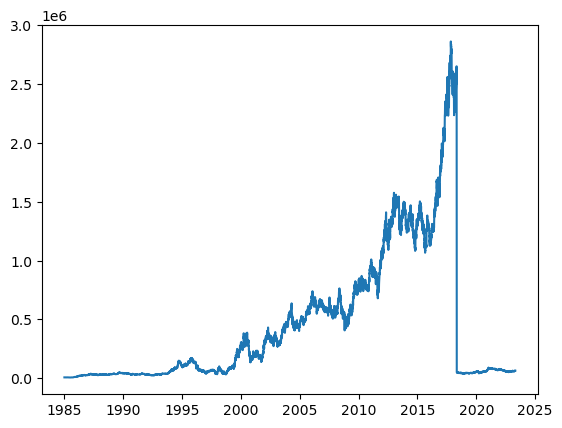

In [25]:
plt.plot(dates, closes)

주가 데이터에서 수정주가가 필요한 경우에는 `adjusted_price=True` 파라미터를 설정해 호출한다.

In [26]:
data_adjusted = entrypoint.GetDailyStockDataAsDataFrame(code, adjusted_price=True)

2023-04-24 22:20:13,448 [DEBUG] Received 600 records from 2023-04-24 00:00:00 to 2020-11-20 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 22:20:13,693 [DEBUG] Received 600 records from 2020-11-19 00:00:00 to 2018-06-15 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 22:20:30,415 [DEBUG] Received 600 records from 2018-06-14 00:00:00 to 2015-12-30 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 22:20:30,668 [DEBUG] Received 600 records from 2015-12-29 00:00:00 to 2013-07-23 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 22:20:30,905 [DEBUG] Received 600 records from 2013-07-22 00:00:00 to 2011-02-24 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper.py:718
2023-04-24 22:20:31,441 [DEBUG] Received 600 records from 2011-02-23 00:00:00 to 2008-10-06 00:00:00 for code 005930 - KiwoomOpenApiPlusServiceClientStubWrapper

In [27]:
dates = pd.to_datetime(data_adjusted['일자'], format='%Y%m%d')
closes = pd.to_numeric(data_adjusted['현재가'])

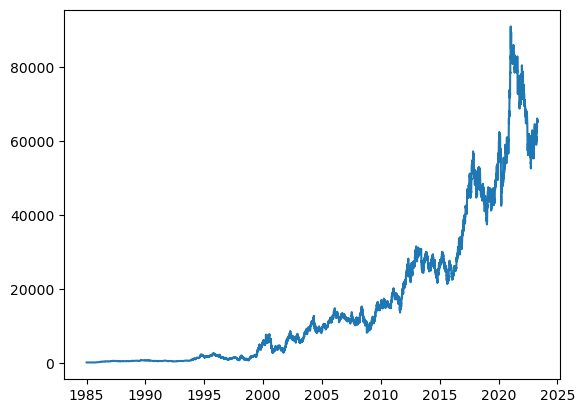

In [28]:
plt.plot(dates, closes)

### 하위 함수 사용 예시

만약에 필요한 TR 에 대한 편의함수가 제공되지 않는 경우라면 아래처럼 직접 TR 요청에 필요한 입력값을 설정해 요청하고, 이후 스트림 형태로 들어오는 이벤트 또한 직접 처리해주는 방식으로 사용할 수 있다.

In [29]:
rqname = '주식기본정보요청'
trcode = 'opt10001'
screen_no = '0001' # 화면번호, 0000을 제외한 4자리 숫자 임의로 지정, None 의 경우 내부적으로 화면번호 자동할당
inputs = {'종목코드': code}

In [30]:
output = {}

In [31]:
logging.info('Requesting data for request name: %s', rqname)
for event in entrypoint.TransactionCall(rqname, trcode, screen_no, inputs):
    logging.info('Got event for request: %s', rqname)
    names = event.single_data.names
    values = event.single_data.values
    for name, value in zip(names, values):
        output[name] = value

2023-04-24 22:21:07,954 [INFO] Requesting data for request name: 주식기본정보요청 - 4145090269.py:1
2023-04-24 22:21:24,236 [INFO] Got event for request: 주식기본정보요청 - 4145090269.py:3


In [32]:
output

{'종목코드': '005930',
 '종목명': '삼성전자',
 '결산월': '12',
 '액면가': '100',
 '자본금': '7780',
 '상장주식': '5969783',
 '신용비율': '+0.06',
 '연중최고': '+66600',
 '연중최저': '-54500',
 '시가총액': '3892298',
 '시가총액비중': '',
 '외인소진률': '+51.70',
 '대용가': '52560',
 'PER': '8.09',
 'EPS': '8057',
 'ROE': '17.1',
 'PBR': '1.28',
 'EV': '3.45',
 'BPS': '50817',
 '매출액': '3022314',
 '영업이익': '433766',
 '당기순이익': '556541',
 '250최고': '+68800',
 '250최저': '-51800',
 '시가': '-65300',
 '고가': '65700',
 '저가': '-64800',
 '상한가': '+85400',
 '하한가': '-46000',
 '기준가': '65700',
 '예상체결가': '-0',
 '예상체결수량': '0',
 '250최고가일': '20220523',
 '250최고가대비율': '-5.23',
 '250최저가일': '20220930',
 '250최저가대비율': '+25.87',
 '현재가': '-65200',
 '대비기호': '5',
 '전일대비': '-500',
 '등락율': '-0.76',
 '거래량': '12986581',
 '거래대비': '+123.23',
 '액면가단위': '원',
 '유통주식': '4526429',
 '유통비율': '75.8'}

위의 코드에서 `TransactionCall()` 함수의 경우 반환되는 스트림의 `event` 객체는 `ListenResponse` 타입의 `gRPC` 메시지 형태로 반환된다.

In [33]:
from pprint import PrettyPrinter
from google.protobuf.json_format import MessageToDict

pp = PrettyPrinter()

def pprint_event(Event):
    pp.pprint(MessageToDict(event, preserving_proto_field_name=True))

In [34]:
pprint_event(event)

{'arguments': [{'string_value': '0001'},
               {'string_value': '주식기본정보요청'},
               {'string_value': 'opt10001'},
               {'string_value': ''},
               {'string_value': '0'}],
 'name': 'OnReceiveTrData',
 'single_data': {'names': ['종목코드',
                           '종목명',
                           '결산월',
                           '액면가',
                           '자본금',
                           '상장주식',
                           '신용비율',
                           '연중최고',
                           '연중최저',
                           '시가총액',
                           '시가총액비중',
                           '외인소진률',
                           '대용가',
                           'PER',
                           'EPS',
                           'ROE',
                           'PBR',
                           'EV',
                           'BPS',
                           '매출액',
                           '영업이익',
                           '당기순이익',
    

해당 메시지의 형태는
https://github.com/elbakramer/koapy/blob/master/koapy/backend/kiwoom_open_api_plus/grpc/KiwoomOpenApiPlusService.proto
파일의 내용, 구체적으로 아래와 같은 메시지의 정의 부분을 참고하기 바란다.

```c#
message ListenResponse {
    string name = 1;
    repeated Argument arguments = 2;
    SingleData single_data = 3;
    MultiData multi_data = 4;
}
```

각 TR 에 따라 싱글데이터/멀티데이터가 선택적으로 설정되어 반환되는데, 그러한 입력/출력과 관련된 정보들은[KOAStudio](https://download.kiwoom.com/web/openapi/kiwoom_openapi_plus_devguide_ver_1.5.pdf#page=7) 프로그램을 활용하거나 아니면 아래처럼 `KiwoomOpenApiPlusTrInfo` 를 통해 프로그램 내에서 확인할 수 있다.

In [35]:
from koapy import KiwoomOpenApiPlusTrInfo

In [36]:
tr_info = KiwoomOpenApiPlusTrInfo.get_trinfo_by_code('opt10001')

In [37]:
tr_info.inputs

[Field('종목코드', 0, 6, 9001)]

In [38]:
tr_info.single_outputs

[Field('종목코드', 0, 20, 389),
 Field('종목명', 20, 50, 302),
 Field('결산월', 40, 20, 315),
 Field('액면가', 60, 20, 310),
 Field('자본금', 80, 20, 309),
 Field('상장주식', 100, 20, 312),
 Field('신용비율', 120, 20, 329),
 Field('연중최고', 140, 20, 1006),
 Field('연중최저', 160, 20, 1009),
 Field('시가총액', 180, 20, 311),
 Field('시가총액비중', 200, 20, 336),
 Field('외인소진률', 220, 20, 314),
 Field('대용가', 240, 20, 308),
 Field('PER', 260, 20, 1600),
 Field('EPS', 280, 20, 1604),
 Field('ROE', 300, 20, 1630),
 Field('PBR', 320, 20, 1601),
 Field('EV', 340, 20, 1608),
 Field('BPS', 360, 20, 1605),
 Field('매출액', 380, 20, 1610),
 Field('영업이익', 400, 20, 1611),
 Field('당기순이익', 420, 20, 1614),
 Field('250최고', 440, 20, 1000),
 Field('250최저', 460, 20, 1003),
 Field('시가', 480, 20, 16),
 Field('고가', 500, 20, 17),
 Field('저가', 520, 20, 18),
 Field('상한가', 540, 20, 305),
 Field('하한가', 560, 20, 306),
 Field('기준가', 580, 20, 307),
 Field('예상체결가', 600, 20, 10023),
 Field('예상체결수량', 620, 20, 10024),
 Field('250최고가일', 640, 20, 1001),
 Field('250

In [39]:
tr_info.multi_outputs

[]

## 5. 조건검색 예시

조건검색을 사용하기 위해서는 먼저 서버에 저장된 조건들을 불러와야 한다.

In [43]:
entrypoint.EnsureConditionLoaded()

1

불러온 조건들의 목록은 아래 함수로 확인이 가능하다.

In [44]:
conditions = entrypoint.GetConditionNameListAsList()

In [45]:
conditions

[(0, '0일 0.1%이상'),
 (1, 'BB 매수'),
 (2, '5일 세력 매수'),
 (3, '0일기준 5일 +5000씩'),
 (4, '0일기준 1일 +3000씩'),
 (5, '0일기준 20일 +5000씩'),
 (6, '5일 20일 +5000'),
 (7, '1일 5일 +3000 +5000')]

이후 예시의 정상동작을 위해서는 아래에서 사용되는 조건들과 같은 이름을 가지는 조건들이 미리 저장되어 있어야 한다.

- 대형 저평가 우량주
- 중소형 저평가주
- ~~나는 그냥 내 조건식으로 진행하겠다.~~

위의 조건식들은 키움에서 예시로 제공하는 추천식들을 그대로 이름을 똑같이 해서 저장한 것들이다. 참고로 조건들을 편집하고 저장하는건 영웅문 HTS 내부에서만 가능하기 때문에 따로 HTS를 열어 편집해주어야 한다.

조건식이 편집된 이후에 해당 조건식을 기존에 동작중인 OpenAPI 에도 갱신하고 싶은 경우, 아래 함수를 통해 편집된 조건식을 새로 불러온다.

In [46]:
entrypoint.LoadCondition()

1

### 일반 조건검색 예시

In [59]:
condition_name = '1일 5일 +3000 +5000'

In [61]:
codes = entrypoint.GetCodeListByCondition(condition_name)


_MultiThreadedRendezvous: <_MultiThreadedRendezvous of RPC that terminated with:
	status = StatusCode.UNKNOWN
	details = "Exception iterating responses: 'str' object has no attribute '__name__'"
	debug_error_string = "UNKNOWN:Error received from peer  {created_time:"2023-04-24T14:33:49.094896093+00:00", grpc_status:2, grpc_message:"Exception iterating responses: \'str\' object has no attribute \'__name__\'"}"
>